In [52]:
from langgraph.graph import StateGraph,  END, START
from typing import TypedDict

In [53]:
# ----------- 1. State Definition -----------

class MarksState(TypedDict):
    Physics: float
    Chemistry: float
    Maths: float

    max_subject: str
    max_marks: float

    min_subject: str
    min_marks: float
    
    avg_marks: float
    summary: str

In [54]:
def find_max_marks(state: MarksState) -> MarksState:
    physics = state["Physics"]
    chemistry = state["Chemistry"]
    maths = state["Maths"]

    if physics >= chemistry and physics >= maths:
        return {"max_subject": "Physics", "max_marks": physics}
    elif chemistry >= physics and chemistry >= maths:
        return {"max_subject": "Chemistry", "max_marks": chemistry}
    else:
        return {"max_subject": "Maths", "max_marks": maths}

In [55]:
def find_min_marks(state: MarksState) -> MarksState:
    physics = state["Physics"]
    chemistry = state["Chemistry"]
    maths = state["Maths"]

    if physics <= chemistry and physics <= maths:
        return {"min_subject": "Physics", "min_marks": physics}
    elif chemistry <= physics and chemistry <= maths:
        return {"min_subject": "Chemistry", "min_marks": chemistry}
    else:
        return {"min_subject": "Maths", "min_marks": maths}

In [56]:
def calculate_average(state: MarksState) -> MarksState:
    avg = (state["Physics"] + state["Chemistry"] + state["Maths"]) / 3
    state["avg_marks"] = round(avg, 2)
    return state

In [57]:
def summarize(state: MarksState) -> MarksState:
    state["summary"] = (
        f"🔹 Highest marks in {state['max_subject']} ({state['max_marks']})\n"
        f"🔹 Lowest marks in {state['min_subject']} ({state['min_marks']})\n"
        f"🔹 Average marks: {state['avg_marks']}"
    )
    return state

In [58]:
workflow = StateGraph(MarksState)

# Register all nodes
workflow.add_node("Find_Max", find_max_marks)
workflow.add_node("Find_Min", find_min_marks)
workflow.add_node("Find_Average", calculate_average)
workflow.add_node("Summary", summarize)


# Add Edges
# Parallel branches
workflow.add_edge(START, "Find_Max")
workflow.add_edge(START, "Find_Min")
workflow.add_edge(START, "Find_Average")

# Join at summary
workflow.add_edge("Find_Max", "Summary")
workflow.add_edge("Find_Min", "Summary")
workflow.add_edge("Find_Average", "Summary")

# End node
workflow.add_edge("Summary", END)


In [59]:

# Compile the graph
graph = workflow.compile()

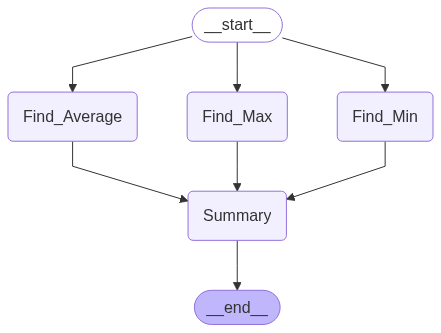

In [60]:
# Draw the Graph
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [61]:
input_data = {
    "Physics": 92.5,
    "Chemistry": 85.5,
    "Maths": 78
}

result = graph.invoke(input_data)

In [62]:
print(result["summary"])

🔹 Highest marks in Physics (92.5)
🔹 Lowest marks in Maths (78)
🔹 Average marks: 85.33
